In [1]:
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
path = 'data'

In [3]:
data = [os.path.join(path,x) for x in os.listdir(path)]

In [4]:
images = [data[x] for x in range(len(data)) if data[x].endswith('.jpeg')]

In [5]:
labels = [data[x] for x in range(len(data)) if data[x].endswith('.txt')]

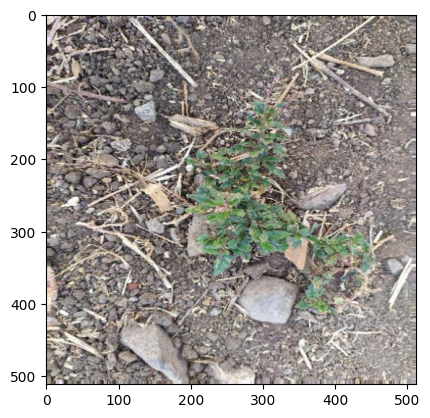

In [6]:
#checking our conversion is working or not
plt.imshow(cv2.cvtColor(cv2.imread(images[0]),cv2.COLOR_BGR2RGB))

In [7]:
df = pd.DataFrame(columns=['image_name','object','x_cen','y_cen','w','h'])
i=0
for id in tqdm(images):
    label = open(id[:-5]+'.txt','r') 
    a = label.read()
    label.close()
    label = a.split('\n')
    cleaned_label = label[:-1]
    
    for name in cleaned_label:
        ind_label = name.split(' ')
        df.loc[i,'image_name'] = id[5:]
        df.loc[i,'object'] = int(ind_label[0])
        df.loc[i,'x_cen'] = float(ind_label[1])
        df.loc[i,'y_cen'] = float(ind_label[2])
        df.loc[i,'w'] = float(ind_label[3])
        df.loc[i,'h'] = float(ind_label[4])
        i += 1
    

100%|█████████████████████████████████████████████████████████████████████████████| 1300/1300 [00:01<00:00, 706.73it/s]


In [8]:
df.head()

,image_name,object,x_cen,y_cen,w,h
0,agri_0_1009.jpeg,1,0.608398,0.498047,0.541016,0.53125
1,agri_0_1017.jpeg,1,0.496094,0.384766,0.960938,0.753906
2,agri_0_1018.jpeg,1,0.445312,0.483398,0.808594,0.634766
3,agri_0_1020.jpeg,1,0.494141,0.350586,0.730469,0.611328
4,agri_0_1024.jpeg,1,0.601562,0.448242,0.570312,0.595703


In [9]:
#column name for pascal-voc dataframe
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']

In [10]:
pascal_voc = pd.DataFrame(columns=column_name)
for i in tqdm(range(len(df))):
    pascal_voc.loc[i,'filename'] = df.loc[i,'image_name']
    pascal_voc.loc[i,'width'] = 512
    pascal_voc.loc[i,'height']= 512  
    if df.loc[i,'object'] == 0:    
        pascal_voc.loc[i,'class'] = 'crop'
    else:
        pascal_voc.loc[i,'class'] = 'weed'
    pascal_voc.loc[i,'xmin']  = int((df.loc[i,'x_cen'] - df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymin']  = int((df.loc[i,'y_cen'] - df.loc[i,'h']/2)*512)
    pascal_voc.loc[i,'xmax']  = int((df.loc[i,'x_cen'] + df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymax']  = int((df.loc[i,'y_cen'] + df.loc[i,'h']/2)*512) 

100%|████████████████████████████████████████████████████████████████████████████| 2072/2072 [00:01<00:00, 1309.60it/s]


In [11]:
pascal_voc

,filename,width,height,class,xmin,ymin,xmax,ymax
0,agri_0_1009.jpeg,512,512,weed,172,119,449,391
1,agri_0_1017.jpeg,512,512,weed,8,4,500,390
2,agri_0_1018.jpeg,512,512,weed,20,84,434,409
3,agri_0_1020.jpeg,512,512,weed,66,23,440,336
4,agri_0_1024.jpeg,512,512,weed,161,76,453,381
...,...,...,...,...,...,...,...,...
2067,agri_0_9963.jpeg,512,512,weed,58,80,455,336
2068,agri_0_9971.jpeg,512,512,weed,45,132,228,311
2069,agri_0_9971.jpeg,512,512,weed,52,355,227,512
2070,agri_0_9971.jpeg,512,512,weed,272,80,458,310


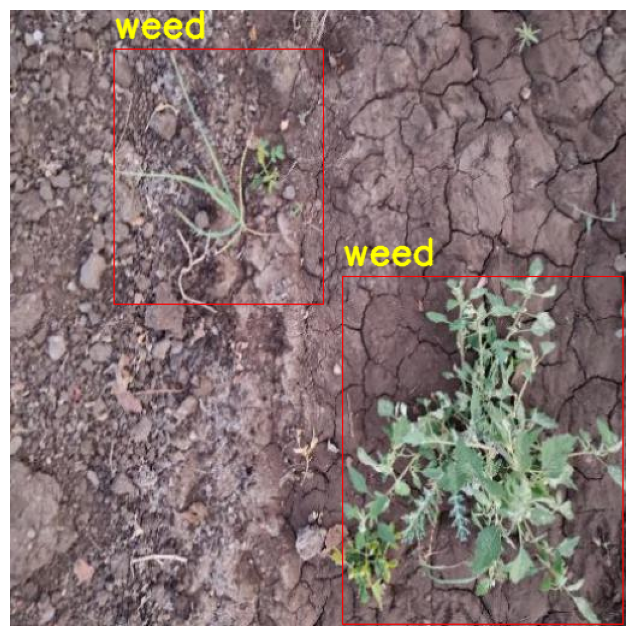

In [12]:
any_index_number = 55 #change this number for different images
image_path = os.path.join(path, pascal_voc.loc[any_index_number, 'filename'])
img = cv2.imread(image_path)
test_image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# test_img = cv2.cvtColor(cv2.imread(image_path = os.path.join(path, pascal_voc.loc[55, 'filename']),cv2.COLOR_BGR2RGB)
test_df = pascal_voc[pascal_voc['filename']==pascal_voc.loc[any_index_number,'filename']].reset_index(drop=True)
for i in range(len(test_df)):
    
    rec = cv2.rectangle(test_image, (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']), (test_df.loc[i,'xmax'],test_df.loc[i,'ymax']), (255,0,0), 1, 1) 
    text = cv2.putText(rec, test_df.loc[i,'class'], (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']-10), cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,0), 2, cv2.LINE_AA)
    
plt.figure(figsize=(8,8))    
plt.imshow(text)
plt.axis('off')
plt.show()

In [13]:
pascal_voc.to_csv('pascal_voc_format.csv',index=False)

In [14]:

df = pd.read_csv("pascal_voc_format.csv")

In [15]:
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,agri_0_1009.jpeg,512,512,weed,172,119,449,391
1,agri_0_1017.jpeg,512,512,weed,8,4,500,390
2,agri_0_1018.jpeg,512,512,weed,20,84,434,409
3,agri_0_1020.jpeg,512,512,weed,66,23,440,336
4,agri_0_1024.jpeg,512,512,weed,161,76,453,381


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2072 non-null   object
 1   width     2072 non-null   int64 
 2   height    2072 non-null   int64 
 3   class     2072 non-null   object
 4   xmin      2072 non-null   int64 
 5   ymin      2072 non-null   int64 
 6   xmax      2072 non-null   int64 
 7   ymax      2072 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 129.6+ KB


16it [00:00, 90.85it/s]


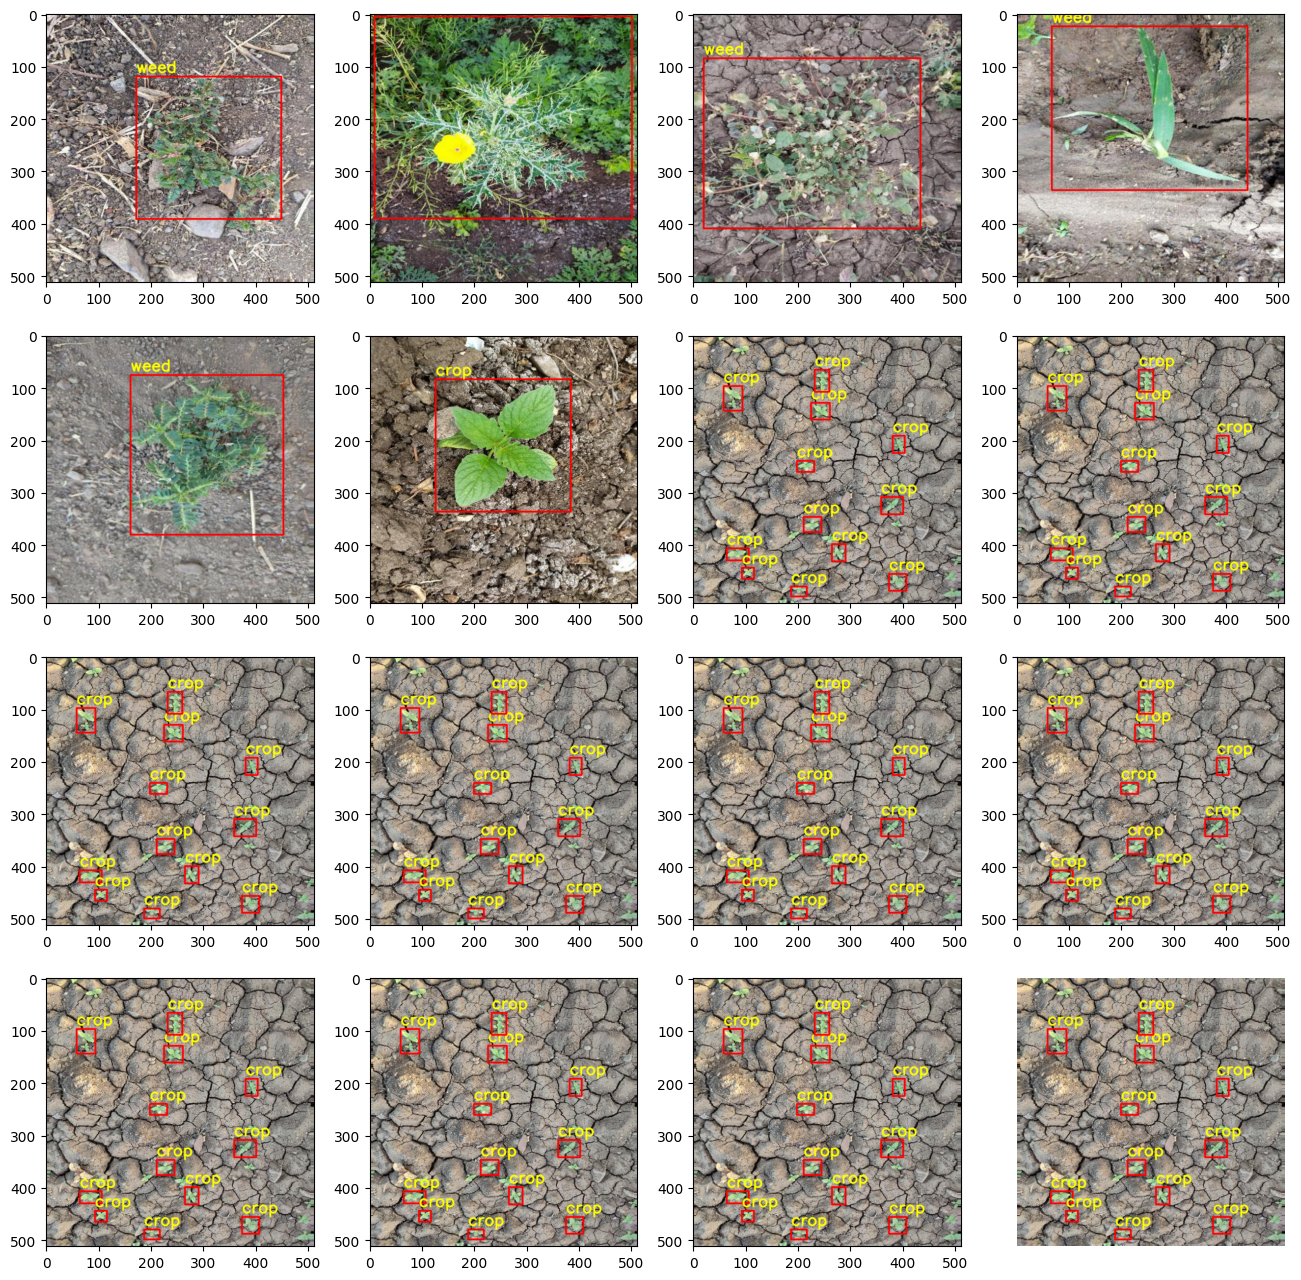

In [17]:
_ , axes = plt.subplots(4,4,figsize=(16,16))
for i,ax in tqdm(zip(range(16),axes.flat)):
    temp_df = df[df['filename']==pascal_voc.loc[i,'filename']].reset_index(drop=True)
    image_path = os.path.join(path, pascal_voc.loc[i, 'filename'])
    img = cv2.imread(image_path)
    # temp_img = cv2.imread(path+folder_images[i])
    temp_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for j in range(len(temp_df)):
        rect = cv2.rectangle(temp_img,(temp_df.loc[j,'xmin'],temp_df.loc[j,'ymin']),(temp_df.loc[j,'xmax'],temp_df.loc[j,'ymax']),(255,0,0),2,cv2.LINE_AA)
        rect_text = cv2.putText(rect,temp_df.loc[j,'class'],(temp_df.loc[j,'xmin'],temp_df.loc[j,'ymin']-8), cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,0), 2, cv2.LINE_AA)
    ax.imshow(rect_text)
    plt.axis('off')

In [18]:
import keras
keras.__version__
from keras import layers
from keras import models
from keras import optimizers

In [19]:

from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

# Insert the new layers here
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\akash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 75, 75, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 37, 37, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 37, 37, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 18, 18, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 18, 18, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      42,467,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,008,834 (164.07 MB)

 Trainable params: 43,006,850 (164.06 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [21]:
import os
import shutil
import random
import time

# Define directories
base_dir = 'data'  # Base directory where images, labels, and train, validation, and test folders are located
source_dir = base_dir  # Directory where the images and YOLO labels are located
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Create class directories in train, validation, and test directories
classes = {'0': 'weed', '1': 'crop'}  # Define classes

# Ensure the class directories are created in each split directory
for split_dir in [train_dir, validation_dir, test_dir]:
    for class_name in classes.values():
        os.makedirs(os.path.join(split_dir, class_name), exist_ok=True)

# Get list of image-label pairs
image_label_pairs = [(file.replace('.txt', '.Jpeg'), file) for file in os.listdir(source_dir) if file.endswith('.txt')]

# Shuffle the list to ensure random distribution
random.shuffle(image_label_pairs)

# Calculate split indices
total_count = len(image_label_pairs)
train_count = int(0.7 * total_count)
validation_count = int(0.2 * total_count)
test_count = total_count - train_count - validation_count

# Split the list into train, validation, and test sets
train_pairs = image_label_pairs[:train_count]
validation_pairs = image_label_pairs[train_count:train_count + validation_count]
test_pairs = image_label_pairs[train_count + validation_count:]

# Function to copy and then remove images based on YOLO labels with retry mechanism
def copy_and_remove_images_based_on_labels(pairs, dest_dir):
    for image_file, label_file in pairs:
        label_path = os.path.join(source_dir, label_file)
        image_path = os.path.join(source_dir, image_file)
        
        # Read the label file to get the class
        if os.path.isfile(label_path):
            with open(label_path, 'r') as f:
                lines = f.readlines()
                f.close()
                for line in lines:
                    parts = line.strip().split()
                    class_id = parts[0]
                    if class_id in classes:
                        class_name = classes[class_id]
                        dest_class_dir = os.path.join(dest_dir, class_name)
                        
                        # Copy the image file
                        if os.path.isfile(image_path):
                            print(f"Copying image file: {image_path} to {dest_class_dir}")
                            shutil.copy2(image_path, os.path.join(dest_class_dir, image_file))
                            retry_count = 5
                            while retry_count > 0:
                                try:
                                    os.remove(image_path)
                                    break
                                except PermissionError:
                                    retry_count -= 1
                                    time.sleep(1)
                                    if retry_count == 0:
                                        print(f"Failed to remove image file: {image_path} after several retries")
                        else:
                            print(f"Image file not found: {image_path}")
                        
                        # Copy the label file
                        print(f"Copying label file: {label_path} to {dest_class_dir}")
                        shutil.copy2(label_path, os.path.join(dest_class_dir, label_file))
                        retry_count = 5
                        while retry_count > 0:
                            try:
                                os.remove(label_path)
                                break
                            except PermissionError:
                                retry_count -= 1
                                time.sleep(1)
                                if retry_count == 0:
                                    print(f"Failed to remove label file: {label_path} after several retries")
                        break  # Assumes one class per file
        else:
            print(f"Label file not found: {label_path}")

# Move images and labels to train, validation, and test directories
copy_and_remove_images_based_on_labels(train_pairs, train_dir)
copy_and_remove_images_based_on_labels(validation_pairs, validation_dir)
copy_and_remove_images_based_on_labels(test_pairs, test_dir)

Copying image file: data\agri_0_5210.Jpeg to data\train\weed
Copying label file: data\agri_0_5210.txt to data\train\weed
Copying image file: data\agri_0_5401.Jpeg to data\train\weed
Copying label file: data\agri_0_5401.txt to data\train\weed
Copying image file: data\agri_0_7375.Jpeg to data\train\crop
Copying label file: data\agri_0_7375.txt to data\train\crop
Copying image file: data\agri_0_1961.Jpeg to data\train\crop
Copying label file: data\agri_0_1961.txt to data\train\crop
Copying image file: data\agri_0_7705.Jpeg to data\train\crop
Copying label file: data\agri_0_7705.txt to data\train\crop
Copying image file: data\agri_0_3077.Jpeg to data\train\crop
Copying label file: data\agri_0_3077.txt to data\train\crop
Copying image file: data\agri_0_7489.Jpeg to data\train\weed
Copying label file: data\agri_0_7489.txt to data\train\weed
Copying image file: data\agri_0_3412.Jpeg to data\train\crop
Copying label file: data\agri_0_3412.txt to data\train\crop
Copying image file: data\agri_0_

In [22]:
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # target_size=(512, 512),
        target_size=(150, 150),
        color_mode="rgb",   
        batch_size=92,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        # target_size=(512, 512),
        target_size=(150, 150),
        color_mode="rgb",
        batch_size=31,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        # target_size=(512, 512),
        target_size=(150, 150),
        color_mode="rgb",
        batch_size=31,
        class_mode='categorical')

Found 909 images belonging to 2 classes.
Found 260 images belonging to 2 classes.
Found 131 images belonging to 2 classes.


In [23]:
import math
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Number of training and validation samples
training_samples = 909
batch_size_training_generator = 16
validation_samples = 260
batch_size_validation_generator = 8

lr_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                 patience=2, 
                                 verbose=1, 
                                 factor=0.5, 
                                 min_lr=0.00001)

history = model.fit(
    train_generator,
    steps_per_epoch=math.ceil(training_samples / batch_size_training_generator),
    epochs=15,
    validation_data=validation_generator,
    validation_steps=math.ceil(validation_samples / batch_size_validation_generator),
    callbacks=[lr_reduction]
)

Epoch 1/15


C:\Users\akash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/57 ━━━━━━━━━━━━━━━━━━━━ 1:37 2s/step - acc: 0.6735 - loss: 2.7723

C:\Users\akash\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 412ms/step - acc: 0.7649 - loss: 2.1447 - val_acc: 0.5308 - val_loss: 7.1110 - learning_rate: 0.0010
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 330ms/step - acc: 0.9031 - loss: 0.5366 - val_acc: 0.7346 - val_loss: 0.5917 - learning_rate: 0.0010
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 321ms/step - acc: 0.9320 - loss: 0.3531 - val_acc: 0.4692 - val_loss: 0.8123 - learning_rate: 0.0010
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 320ms/step - acc: 0.8953 - loss: 0.3541 - val_acc: 0.8615 - val_loss: 0.4705 - learning_rate: 0.0010
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 319ms/step - acc: 0.9355 - loss: 0.2155 - val_acc: 0.4692 - val_loss: 1.1161 - learning_rate: 0.0010
Epoch 6/15
10/57 ━━━━━━━━━━━━━━━━━━━━ 1:25 2s/step - acc: 0.9254 - loss: 0.2382
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 319ms/step - acc: 0.9343 - loss: 0.2452 - val_acc: 0.6808 - val_loss: 0.5630 - learning_rate: 0.0010
Epoch 7/

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

KeyError: 'accuracy'

In [62]:
import math

# Define the number of test samples and batch size
test_samples = 131
batch_size_test = 16

# Evaluate the model using the test generator
score = model.evaluate(test_generator, steps=math.ceil(test_samples / batch_size_test))

# Print the evaluation metrics
print(f"Test Loss: {score[0]:.4f}")
print(f"Test Accuracy: {score[1]:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.5015 - loss: 0.9386
Test Loss: 0.9296
Test Accuracy: 0.5038


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step
Classification Report:
              precision    recall  f1-score   support

        crop       0.00      0.00      0.00        66
        weed       0.49      0.98      0.66        65

    accuracy                           0.49       131
   macro avg       0.25      0.49      0.33       131
weighted avg       0.24      0.49      0.33       131



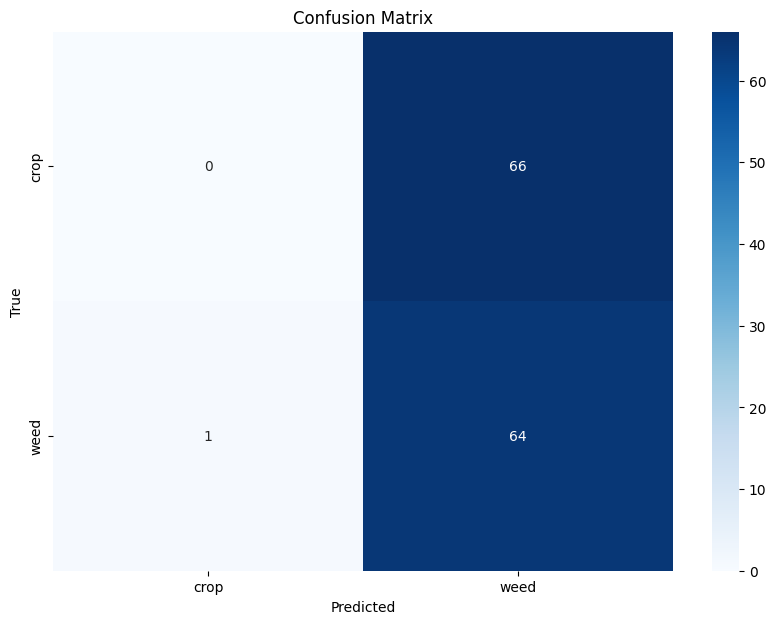

In [63]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions from the model
test_predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(test_predictions, axis=1)

# True labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # Names of the classes

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Classification Report
class_report = classification_report(true_classes, predicted_classes, target_names=class_labels)

# Print the classification report
print("Classification Report:")
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()